# Tarefa - Análise de Contratos

# **Geração de Dados**

In [1]:
!pip install pandas faker

**Importar dados**

In [2]:
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

**Faker para gerar dados fictícios**

In [3]:
fake = Faker('pt_BR')

**Gerar dados dos "contratos"**

In [8]:
quantidade_de_contratos = 100
dados_contrato = []
for _ in range(quantidade_de_contratos):
    numero_contrato = fake.random_int(min=1000, max=9999)
    data_assinatura = fake.date_between(start_date='-5y', end_date='today')
    valor_contrato = round(random.uniform(10000, 50000), 2)
    duracao_contrato = fake.random_int(min=1, max=5)
    cnpj_fornecedor = fake.cnpj()
    nome_fornecedor = fake.company()
    agencia_governamental = fake.company()
    #valor_total_contrato = valor_contrato
    valor_pago = 0
    valor_a_pagar = valor_contrato
    data_pagamento_parcela = [fake.date_between_dates(date_start=data_assinatura, date_end=data_assinatura + timedelta(days=365 * duracao_contrato)) for _ in range(duracao_contrato)]

    # Dados Geográficos (gerados aleatoriamente)
    latitude = round(random.uniform(-90, 90), 6)
    longitude = round(random.uniform(-180, 180), 6)

    # Histórico de Pagamentos (lista de pagamentos)
    historico_pagamentos = []
    for i in range(duracao_contrato):
        valor_parcela = round(random.uniform(0, valor_a_pagar), 2)
        data_pagamento = data_pagamento_parcela[i]
        valor_a_pagar -= valor_parcela
        valor_pago += valor_parcela
        historico_pagamentos.append({'Data Pagamento': data_pagamento, 'Valor': valor_parcela})

    # Adicione os dados à lista
    dados_contrato.append([numero_contrato, data_assinatura, valor_contrato, duracao_contrato, cnpj_fornecedor, nome_fornecedor, agencia_governamental, valor_pago, valor_a_pagar, data_pagamento_parcela, latitude, longitude, historico_pagamentos])

**DataFrame a partir dos dados**

In [9]:
df = pd.DataFrame(dados_contrato, columns=["Número do contrato", "Data de assinatura do contrato", "Valor do contrato",
                                           "Duração do contrato", "CNPJ da empresa ou fornecedor contratado","Nome da empresa ou fornecedor contratado",
                                           "Nome da agência governamental",
                                           "Valor pago até o momento", "Valor a ser pago no futuro",
                                           "Data de pagamento de parcelas", "Latitude", "Longitude", "Histórico de Pagamentos"])


**DataFrame em um arquivo CSV**

In [10]:
df.to_csv('dados_contrato.csv', index=False)
print("Planilha de dados gerada e salva em 'dados_contrato.csv'")

Planilha de dados gerada e salva em 'dados_contrato.csv'


In [12]:
df

,Número do contrato,Data de assinatura do contrato,Valor do contrato,Duração do contrato,CNPJ da empresa ou fornecedor contratado,Nome da empresa ou fornecedor contratado,Nome da agência governamental,Valor pago até o momento,Valor a ser pago no futuro,Data de pagamento de parcelas,Latitude,Longitude,Histórico de Pagamentos
0,3835,2019-06-13,43482.03,4,68.312.509/0001-03,Alves S.A.,Nunes Ltda.,43479.24,2.79,"[2021-06-03, 2021-07-19, 2020-02-27, 2022-08-06]",-1.952629,139.832789,"[{'Data Pagamento': 2021-06-03, 'Valor': 17355..."
1,3876,2019-03-18,32080.51,2,63.708.249/0001-76,da Cruz,Martins Viana e Filhos,5081.10,26999.41,"[2021-01-09, 2020-11-08]",52.260872,-85.287613,"[{'Data Pagamento': 2021-01-09, 'Valor': 1364...."
2,1811,2021-12-28,46933.88,1,86.397.510/0001-60,Pinto Novaes S.A.,da Luz,42946.41,3987.47,[2022-04-13],25.878949,-90.708055,"[{'Data Pagamento': 2022-04-13, 'Valor': 42946..."
3,8230,2020-12-03,39752.12,4,18.960.542/0001-71,Costa,Ferreira Ramos Ltda.,39721.68,30.44,"[2024-06-01, 2024-06-15, 2024-11-19, 2024-01-16]",67.339848,30.004477,"[{'Data Pagamento': 2024-06-01, 'Valor': 38846..."
4,2036,2021-12-04,37088.31,3,75.968.321/0001-83,Farias Araújo e Filhos,da Cunha Mendes - EI,35838.82,1249.49,"[2022-09-15, 2023-12-13, 2022-08-15]",-23.096287,-41.270609,"[{'Data Pagamento': 2022-09-15, 'Valor': 2268...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2953,2019-04-20,39403.80,3,81.375.904/0001-01,Fogaça,Pinto S.A.,37644.99,1758.81,"[2019-05-07, 2021-04-15, 2021-11-30]",21.551422,69.407542,"[{'Data Pagamento': 2019-05-07, 'Valor': 33244..."
96,6909,2020-06-15,17428.28,4,83.705.192/0001-69,Silveira e Filhos,Moura S.A.,17399.28,29.00,"[2023-08-04, 2022-02-09, 2021-10-20, 2022-05-26]",60.823657,71.859784,"[{'Data Pagamento': 2023-08-04, 'Valor': 16240..."
97,6039,2019-07-10,44031.95,1,08.261.543/0001-74,Santos,Silva,24355.15,19676.80,[2020-02-29],34.071091,25.261232,"[{'Data Pagamento': 2020-02-29, 'Valor': 24355..."
98,8464,2019-02-23,34071.20,1,23.478.690/0001-94,Gomes,Cardoso,5137.12,28934.08,[2019-08-22],-5.042579,135.767536,"[{'Data Pagamento': 2019-08-22, 'Valor': 5137...."


# **Analisar Contratos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dados do arquivo CSV**

In [2]:
dados_contrato = pd.read_csv('dados_contrato.csv')

**Exibir as primeiras linhas do DataFrame para verificar os dados**

In [3]:
print(dados_contrato.head())

   Número do contrato Data de assinatura do contrato  Valor do contrato  \
0                3835                     2019-06-13           43482.03   
1                3876                     2019-03-18           32080.51   
2                1811                     2021-12-28           46933.88   
3                8230                     2020-12-03           39752.12   
4                2036                     2021-12-04           37088.31   

   Duração do contrato CNPJ da empresa ou fornecedor contratado  \
0                    4                       68.312.509/0001-03   
1                    2                       63.708.249/0001-76   
2                    1                       86.397.510/0001-60   
3                    4                       18.960.542/0001-71   
4                    3                       75.968.321/0001-83   

  Nome da empresa ou fornecedor contratado Nome da agência governamental  \
0                               Alves S.A.                   Nunes Ltd



*   **Análise exploratória simples**
*   **Estatísticas descritivas dos valores dos contratos**



In [4]:
estatisticas_contratos = dados_contrato[['Valor do contrato', 'Valor pago até o momento', 'Valor a ser pago no futuro']].describe()
print(estatisticas_contratos)

       Valor do contrato  Valor pago até o momento  Valor a ser pago no futuro
count         100.000000                 100.00000                  100.000000
mean        29899.004400               24384.16560                 5514.838800
std         12040.001664               13216.53624                 8239.114688
min         10245.400000                 213.44000                    0.370000
25%         19288.775000               12867.12000                  168.290000
50%         29934.255000               23542.98500                 1501.055000
75%         41140.455000               35984.13500                 7643.140000
max         49689.490000               49114.16000                42779.330000


In [5]:
df_valor = dados_contrato.sort_values(by="Valor do contrato", ascending=False)
print(df_valor.head(10))

    Número do contrato Data de assinatura do contrato  Valor do contrato  \
21                7681                     2021-11-16           49689.49   
45                5429                     2019-03-03           49527.27   
36                6516                     2022-09-12           48617.17   
77                8875                     2023-05-23           47930.68   
20                2821                     2018-11-20           47850.45   
59                3806                     2021-04-02           47353.01   
78                3307                     2020-05-30           47240.92   
2                 1811                     2021-12-28           46933.88   
10                5394                     2023-06-02           46783.23   
53                7957                     2020-09-20           46668.08   

    Duração do contrato CNPJ da empresa ou fornecedor contratado  \
21                    5                       47.683.910/0001-80   
45                    1    

# **Exercício**

**Faça uma análise do histórico de pagamentos. Sua análise precisa de recursos gráficos e responder as seguintes perguntas:**



1.   **Quais são os principais fornecedores?**
2.   **Quais regiões receberam mais verbas ?**
3.   **Quanto falta para pagar de cada contrato?**
4.   **Que colunas deveriam ser acrescentadas para auxiliar na detecção de fraudes?**
5.   **Visualização da distribuição da duração dos contratos**
6.   **Fazer uma análise com regressão linear sobre verbas**



## 1 - Quais são os principais fornecedores?

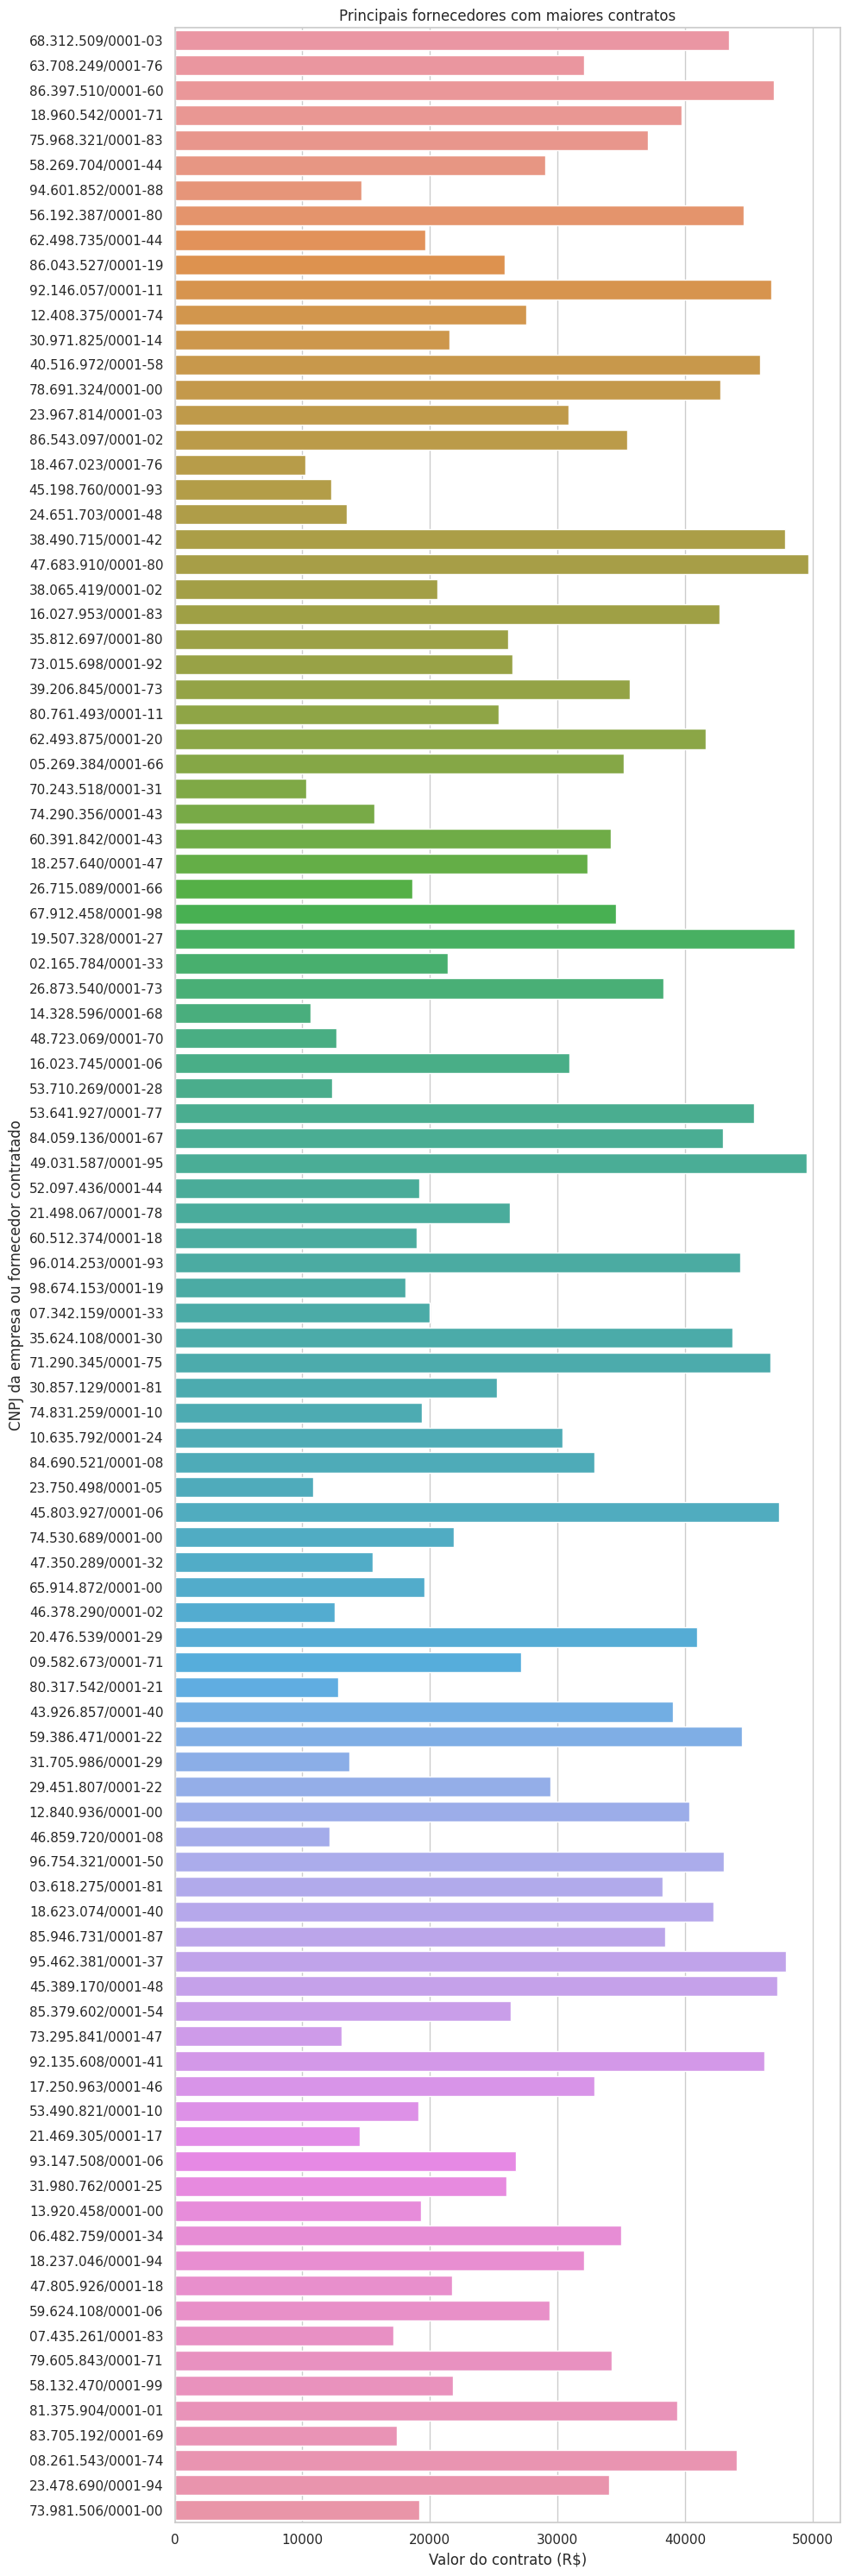

In [8]:
plt.figure(figsize=(10, 30))
sns.set(style='whitegrid')

sns.barplot(data=dados_contrato, orient='h', x="Valor do contrato", y="CNPJ da empresa ou fornecedor contratado")
plt.title('Principais fornecedores com maiores contratos')
plt.xlabel('Valor do contrato (R$)')
plt.tight_layout()

##2 - Quais regiões receberam mais verbas ?

## 3 - Quanto falta para pagar de cada contrato?

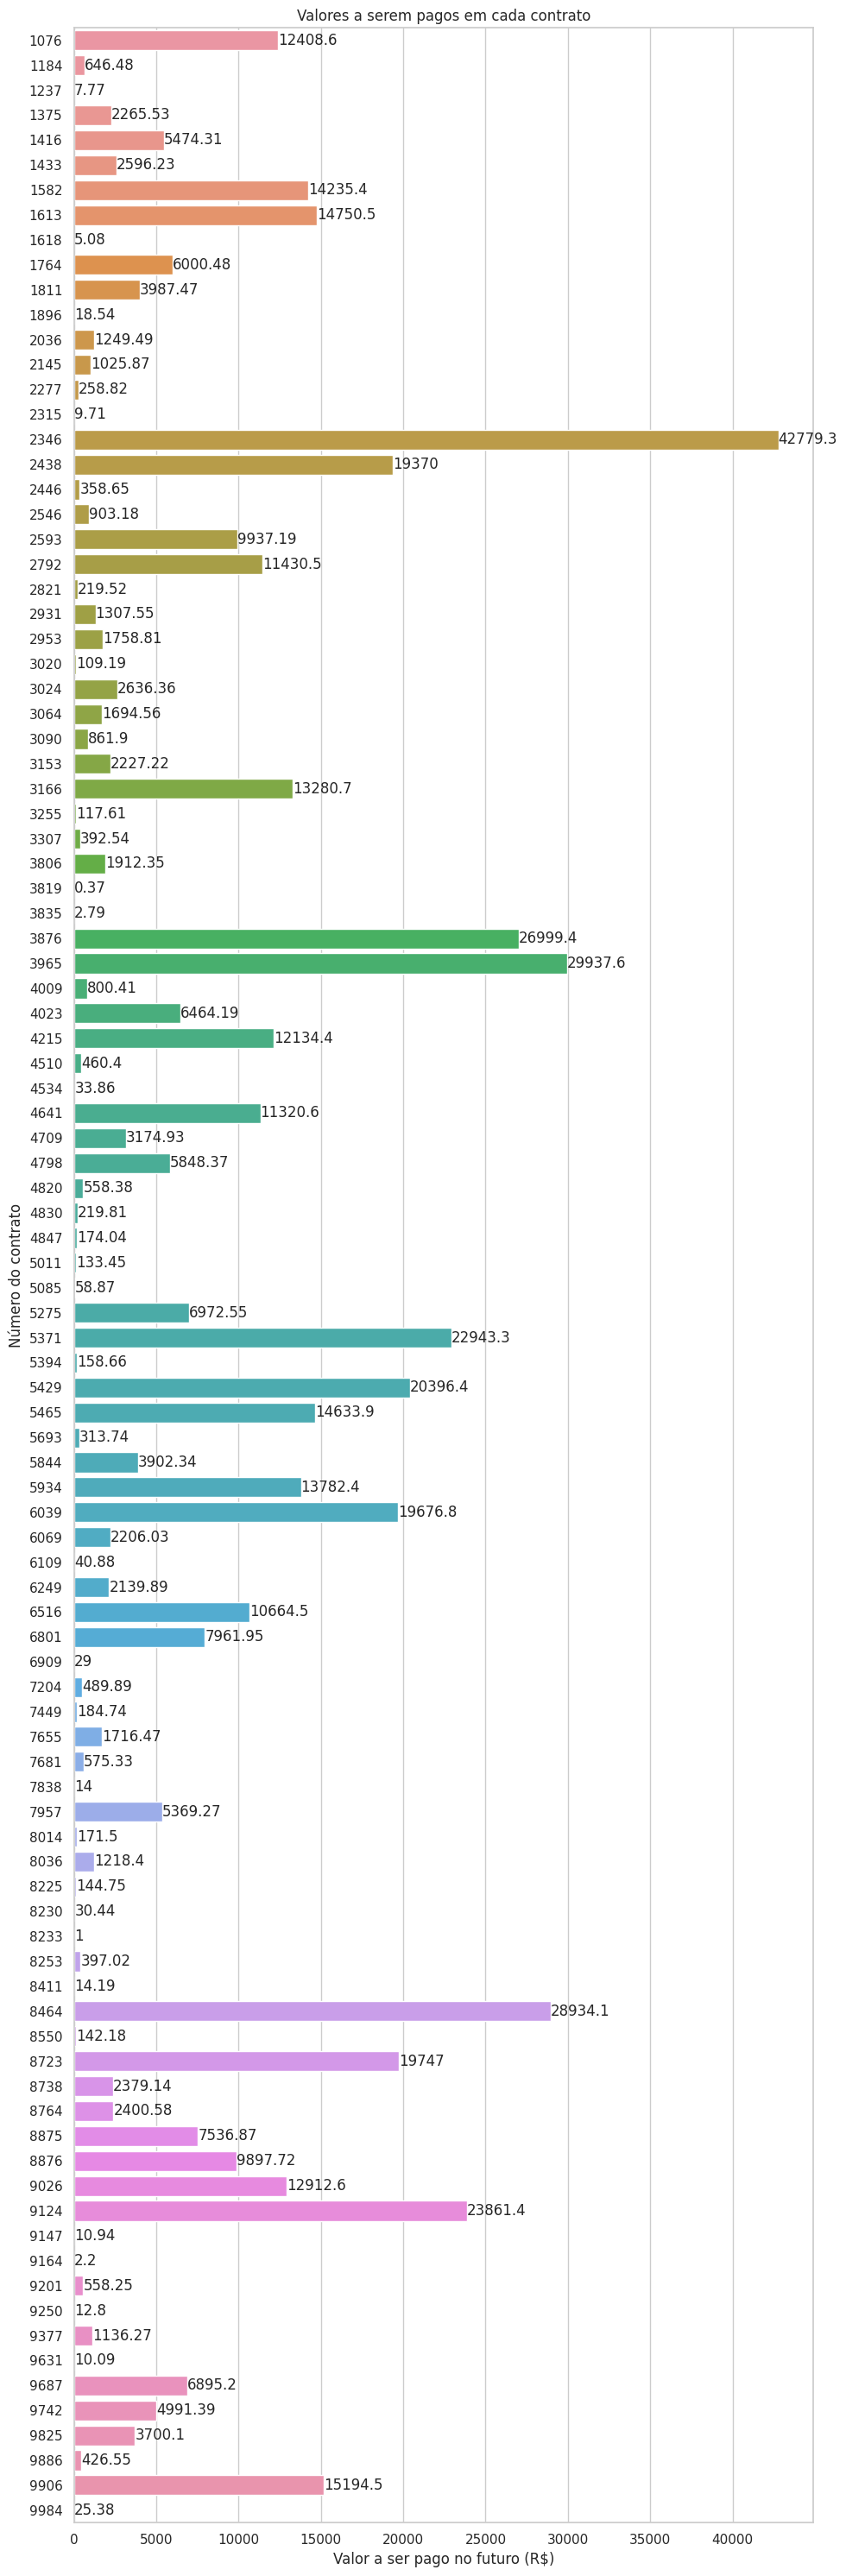

In [68]:
plt.figure(figsize=(10, 30))
sns.set(style='whitegrid')

ax = sns.barplot(data=dados_contrato, orient='h', x="Valor a ser pago no futuro", y="Número do contrato")
ax.bar_label(ax.containers[0])
plt.title('Valores a serem pagos em cada contrato')
plt.xlabel('Valor a ser pago no futuro (R$)')
plt.tight_layout()

## 4 - Que colunas deveriam ser acrescentadas para auxiliar na detecção de fraudes?

Fizemos a inclusão da coluna CNPJ. Ela pode ser utilizada para consulta a base de dados da Receita Federal, por exemplo para verificar se o CNPJ é de uma empresa real e regularizada junto ao governo. Além disso, podemos utilizar o CNPJ para consultar os CPFs dos sócios da empresa fornecedora, verificando se algum sócio é funcionário do orgão público, evitando assim o conflito de interesses ou uma contratação fraudulenta com informações privilegiadas.

## 5 - Visualização da distribuição da duração dos contratos

In [7]:
plt.figure(figsize=(10, 30))
sns.set(style='whitegrid')

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data=dados_contrato, labels="Duração do contrato", colors=palette_color, autopct='%.0f%%')

plt.pie(data=dados_contrato, x="Duração do contrato", )

# Add title to the chart
plt.title('Distribution of grades across different classes')

# displaying chart
plt.show()

TypeError: ignored

<Figure size 1000x3000 with 0 Axes>

## 6 - Fazer uma análise com regressão linear sobre verbas

## Outras análises gráficas realizadas

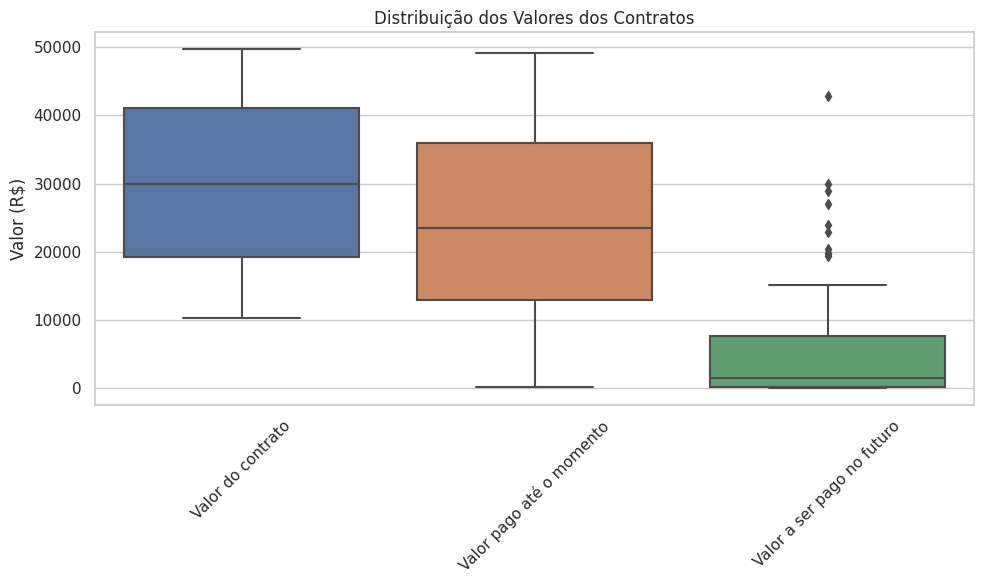

In [64]:
# Visualização dos valores dos contratos
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(data=dados_contrato[['Valor do contrato', 'Valor pago até o momento', 'Valor a ser pago no futuro']])
plt.title('Distribuição dos Valores dos Contratos')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.tight_layout()

**Visualização da localização geográfica dos contratos**

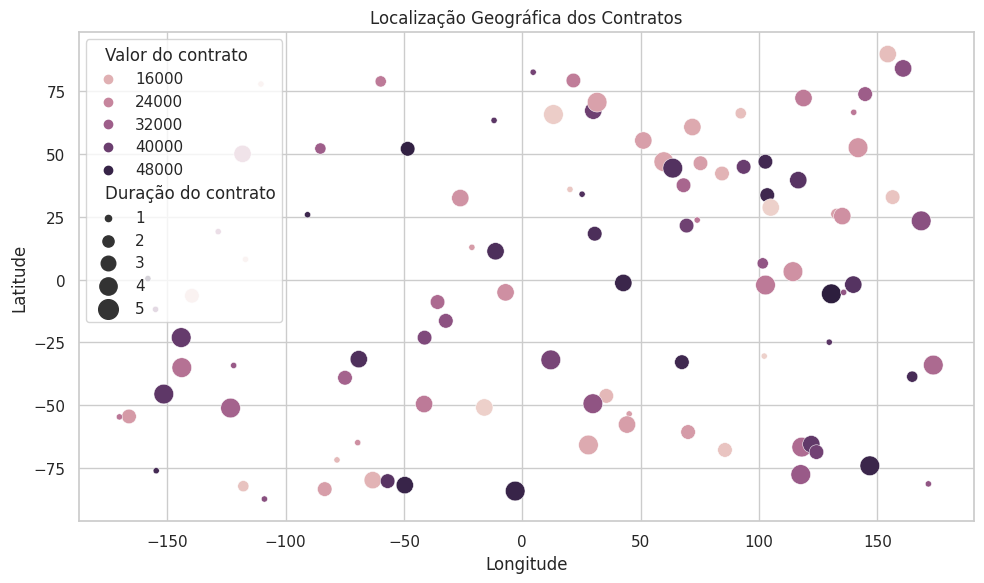

In [20]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.scatterplot(data=dados_contrato, x='Longitude', y='Latitude', hue='Valor do contrato', size='Duração do contrato', sizes=(20, 200))
plt.title('Localização Geográfica dos Contratos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

**Exemplo de análise adicional: Correlação entre variáveis**

<ipython-input-21-d62044239887>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_contrato.corr()


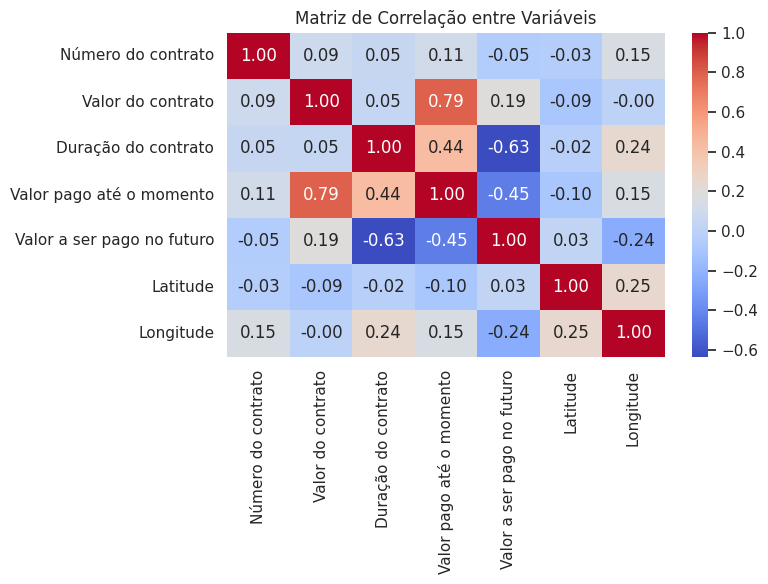

In [21]:
correlacao = dados_contrato.corr()
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.heatmap(data=correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.tight_layout()

plt.show()

In [35]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

v_a_pagar = sns.load_dataset("dados_contrato").sort_values("Valor do contrato", ascending=False)

sns.set_color_codes("pastel")
sns.barplot(data=dados_contrato, x="Valor do contrato", y="Número do contrato",
            label="Valor do contrato", color="b")

sns.set_color_codes("muted")
sns.barplot(data=dados_contrato, x="Valor a ser pago no futuro", y="Número do contrato",
            label="Valor a ser pago", color="b")


ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Quanto falta para pagar de cada contrato?
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)